In [1]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 
import category_encoders as ce
import re 
import warnings 
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from datasist.structdata import detect_outliers
from sklearn.metrics import roc_auc_score, make_scorer, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [6]:
# Loading the dataset
df=pd.read_csv("train.csv")
display(df)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

None

In [8]:
# Check for any missing values in the dataset
print("Number of nulls in each column:")
print(df.isnull().sum())

Number of nulls in each column:
ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [9]:
# Drop columns that are not needed for the analysis
df=df.drop(["ID","Name","SSN"], axis=1)
print("Dropping unnecessary columns of all unique values:")
display(df)

Dropping unnecessary columns of all unique values:


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [10]:
num_col_to_fix=["Age","Annual_Income","Num_of_Loan","Num_of_Delayed_Payment","Changed_Credit_Limit",
             "Outstanding_Debt","Amount_invested_monthly","Monthly_Balance"]
#removing underscores and converting to float
def fix_nums(num):
    try:
        return float(num.replace("_",""))
    except:
        return np.nan    

In [11]:
for col in num_col_to_fix:
    df[col]=df[col].apply(fix_nums)   

In [12]:
display(df[num_col_to_fix])

,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,4.0,7.0,11.27,809.98,80.415295,312.494089
1,23.0,19114.12,4.0,NaN,11.27,809.98,118.280222,284.629162
2,-500.0,19114.12,4.0,7.0,NaN,809.98,81.699521,331.209863
3,23.0,19114.12,4.0,4.0,6.27,809.98,199.458074,223.451310
4,23.0,19114.12,4.0,NaN,11.27,809.98,41.420153,341.489231
...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,2.0,7.0,11.50,502.38,60.971333,NaN
99996,25.0,39628.99,2.0,7.0,11.50,502.38,54.185950,NaN
99997,25.0,39628.99,2.0,6.0,11.50,502.38,24.028477,NaN
99998,25.0,39628.99,2.0,NaN,11.50,502.38,251.672582,NaN


In [13]:
print(df["Type_of_Loan"].value_counts().head(16))

Type_of_Loan
Not Specified                             1408
Credit-Builder Loan                       1280
Personal Loan                             1272
Debt Consolidation Loan                   1264
Student Loan                              1240
Payday Loan                               1200
Mortgage Loan                             1176
Auto Loan                                 1152
Home Equity Loan                          1136
Personal Loan, and Student Loan            320
Not Specified, and Payday Loan             272
Mortgage Loan, and Home Equity Loan        264
Student Loan, and Payday Loan              256
Credit-Builder Loan, and Not Specified     248
Student Loan, and Credit-Builder Loan      248
Payday Loan, and Auto Loan                 240
Name: count, dtype: int64


In [14]:
loan_considered=df["Type_of_Loan"].value_counts().head(9).index[1:].to_list()
for i in loan_considered:
    df[i]=df["Type_of_Loan"].str.contains(i)   # Create a binary column for each loan type
display(df[loan_considered])

,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,True,True,False,False,False,False,True,True
1,True,True,False,False,False,False,True,True
2,True,True,False,False,False,False,True,True
3,True,True,False,False,False,False,True,True
4,True,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...
99995,False,False,False,True,False,False,True,False
99996,False,False,False,True,False,False,True,False
99997,False,False,False,True,False,False,True,False
99998,False,False,False,True,False,False,True,False


In [15]:
# Convert specified loan columns to float type
for col in list(['Credit-Builder Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Payday Loan',
       'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']):
    df[col] = df[col].astype(float)

df=df.drop("Type_of_Loan", axis=1)    
display(df)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,312.494089,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,284.629162,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,CUS_0xd40,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,331.209863,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,223.451310,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,341.489231,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99996,CUS_0x942c,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,CUS_0x942c,June,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99998,CUS_0x942c,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Standard,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
#Checking the rows that have negative number of bank account
display(df[df["Num_Bank_Accounts"]<0])

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
30330,CUS_0x4f2a,March,39.0,Engineer,128305.76,10434.146667,-1,6,1,2.0,...,855.904960,Standard,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30331,CUS_0x4f2a,April,40.0,Engineer,128305.76,NaN,-1,6,1,2.0,...,592.522928,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30332,CUS_0x4f2a,May,40.0,Engineer,128305.76,10434.146667,-1,6,1,2.0,...,936.730670,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30333,CUS_0x4f2a,June,40.0,Engineer,128305.76,10434.146667,-1,6,1,2.0,...,120.129276,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30334,CUS_0x4f2a,July,40.0,Engineer,128305.76,10434.146667,-1,6,1,2.0,...,913.835324,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30335,CUS_0x4f2a,August,40.0,Engineer,22136920.00,NaN,-1,6,1,2.0,...,758.155042,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43689,CUS_0xa878,February,54.0,Engineer,117851.07,9870.922500,-1,6,7,0.0,...,588.947796,Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43690,CUS_0xa878,March,54.0,Engineer,117851.07,9870.922500,-1,6,7,0.0,...,1084.772461,Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43691,CUS_0xa878,April,54.0,Engineer,117851.07,9870.922500,-1,6,7,0.0,...,779.528327,Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43692,CUS_0xa878,May,54.0,Engineer,117851.07,9870.922500,-1,6,7,0.0,...,1037.506338,Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Converting all the number of bank accounts into absolute numbers
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))
display(df["Num_Bank_Accounts"])

0        3
1        3
2        3
3        3
4        3
        ..
99995    4
99996    4
99997    4
99998    4
99999    4
Name: Num_Bank_Accounts, Length: 100000, dtype: int64

In [18]:
#Function to separate years and months from age and adding them to get total number of months.
def fix_history_age(age):
    try : 
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan   
    
#Applying function to fix credit the history age.
df['Credit_History_Age'] = df['Credit_History_Age'].apply(fix_history_age)
display(df["Credit_History_Age"])    

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

In [19]:
print("Payment of Minimum Amount Unique Values:")
display(df['Payment_of_Min_Amount'].unique())

Payment of Minimum Amount Unique Values:


array(['No', 'NM', 'Yes'], dtype=object)

In [20]:
#Replacing NM with No.
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)
display(df['Payment_of_Min_Amount'].unique())

array(['No', 'Yes'], dtype=object)

In [21]:
print("Unique values of Payment_Behaviour:")
display(df['Payment_Behaviour'].unique())

Unique values of Payment_Behaviour:


array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [22]:
#Replacing special characters with null
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [23]:
#Checking the rows with unknown occupation
display(df[df["Occupation"]=="_______"])

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
8,CUS_0x21b1,January,28.0,_______,34847.84,3037.986667,2,4,6,1.0,...,470.690627,Standard,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,CUS_0x2dbc,January,34.0,_______,143162.64,12187.220000,1,5,8,3.0,...,1043.315978,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,CUS_0x2dbc,March,34.0,_______,143162.64,NaN,1,5,8,3.0,...,715.741367,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20,CUS_0x2dbc,May,34.0,_______,143162.64,12187.220000,1,5,8,3.0,...,810.782153,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29,CUS_0xb891,June,55.0,_______,30689.89,2612.490833,2,5,4,1.0,...,419.880784,Standard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,CUS_0x2654,January,37.0,_______,139664.96,11777.746667,3,6,12,4.0,...,NaN,Standard,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99935,CUS_0xb11c,August,38.0,_______,15319.65,1460.637500,6,7,15,4.0,...,NaN,Poor,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
99937,CUS_0xad4f,February,-500.0,_______,22620.79,1722.065833,7,3,9,0.0,...,NaN,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99943,CUS_0xad4f,August,48.0,_______,22620.79,NaN,6,2,9,0.0,...,NaN,Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Identify rows with '_______' as the occupation and get their Customer_IDs
affected_ids=df[df["Occupation"]=="_______"]["Customer_ID"]
# total number of affected IDs
total_affected_ids=len(affected_ids)
k=0
# Loop for each affected Customer_ID
for ID in affected_ids:
    k+=1
    print(f"In total of {total_affected_ids} rows, processing the {k}th row.", end='\r')
    oc=df[df["Customer_ID"]==ID]['Occupation'].mode()[0]
    # Replace '_______' with the most common occupation for the current Customer_ID
    df[df['Customer_ID'] == ID] = df[df['Customer_ID'] == ID].replace("_______",oc)
print("All replacements are completed.")

All replacements are completed.ng the 7062th row.


In [25]:
print("Checking occupation value counts after replacement with mode:")
display(df["Occupation"].value_counts())

Checking occupation value counts after replacement with mode:


Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
_______             5
Name: count, dtype: int64

In [26]:
print("Replacing the rest of the 5 with their mode.")
df["Occupation"]=df["Occupation"].replace("_______", df["Occupation"].mode()[0])
display(df["Occupation"])

Replacing the rest of the 5 with their mode.


0        Scientist
1        Scientist
2        Scientist
3        Scientist
4        Scientist
           ...    
99995     Mechanic
99996     Mechanic
99997     Mechanic
99998     Mechanic
99999     Mechanic
Name: Occupation, Length: 100000, dtype: object

In [27]:
credit_mix_dic={"Bad": 0, "Standard": 1, "Good": 2, "-": np.nan}
print("Label encoding Credit Mix manually.")
df['Credit_Mix'] = df['Credit_Mix'].map(credit_mix_dic)
display(df["Credit_Mix"].value_counts())

Label encoding Credit Mix manually.


Credit_Mix
1.0    36479
2.0    24337
0.0    18989
Name: count, dtype: int64

In [28]:
IDs = 1 
total_rows=df.shape[0]
for ID in df['Customer_ID'].unique() :
    print(f"Of {total_rows}, processing {IDs}th row.", end="\r")
    df['Customer_ID'] = df['Customer_ID'].replace(ID,IDs)
    IDs += 1
print("Replaced customer IDs with simple integer:")
display(df)

Replaced customer IDs with simple integer:


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,1,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,312.494089,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,284.629162,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,331.209863,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,223.451310,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,341.489231,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12500,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99996,12500,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,12500,June,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99998,12500,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Standard,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
num_cols=df.select_dtypes(exclude='object').columns
print("Checking the number of numerical columns now:")
display(num_cols)

Checking the number of numerical columns now:


Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [30]:
# Check for any missing values in the dataset
print("Checking the number of nulls:")
display(df.isnull().sum())

Checking the number of nulls:


Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
Credit-Builder Loan         11408
Personal Loan               11408
Debt Consolidation Loan     11408
Student Loan                11408
Payday Loan                 11408
Mortgage Loan 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

In [32]:
# Dropping all rows that have null values
df = df.dropna()
print("Number of rows and columns after dropping null values:", df.shape)


Number of rows and columns after dropping null values: (42000, 32)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42000 entries, 6 to 98303
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               42000 non-null  int64  
 1   Month                     42000 non-null  object 
 2   Age                       42000 non-null  float64
 3   Occupation                42000 non-null  object 
 4   Annual_Income             42000 non-null  float64
 5   Monthly_Inhand_Salary     42000 non-null  float64
 6   Num_Bank_Accounts         42000 non-null  int64  
 7   Num_Credit_Card           42000 non-null  int64  
 8   Interest_Rate             42000 non-null  int64  
 9   Num_of_Loan               42000 non-null  float64
 10  Delay_from_due_date       42000 non-null  int64  
 11  Num_of_Delayed_Payment    42000 non-null  float64
 12  Changed_Credit_Limit      42000 non-null  float64
 13  Num_Credit_Inquiries      42000 non-null  float64
 14  Credit_Mix 

In [34]:
# Check for any missing values in the dataset
df.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit-Builder Loan         0
Personal Loan               0
Debt Consolidation Loan     0
Student Loan                0
Payday Loan                 0
Mortgage Loan               0
Auto Loan                   0
Home Equity Loan            0
dtype: int64

In [35]:
#def detect_outliers(data, feature):
#    Q1 = data[feature].quantile(0.25)
#    Q3 = data[feature].quantile(0.75)
#    IQR = Q3 - Q1
#    lower_bound = Q1 - 1.5 * IQR
#    upper_bound = Q3 + 1.5 * IQR
    
    # List of indices of outliers
#    outliers_list = data.index[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
#    return outliers_list

#print("Replacing the outliers with median:")
#for col in df.select_dtypes(include=['float64', 'int64']).columns:  # Adjust to select only numeric columns
#    print(f"Processing the {col} column.")
#    outliers_indices = detect_outliers(df, col)
#    median = df[col].median()
#    df.loc[outliers_indices, col] = median  # Use .loc for proper assignment


In [36]:
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # List of indices of outliers
    outliers_list = data.index[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers_list

print("Dropping outliers:")
outliers_indices = set()
for col in df.select_dtypes(include=['float64', 'int64']).columns:  # Adjust to select only numeric columns
    print(f"Processing the column {col}.")
    outliers_indices.update(detect_outliers(df, col))

# Drop the rows with outliers
df = df.drop(index=outliers_indices)
print(f"Dropped {len(outliers_indices)} rows containing outliers.")


Dropping outliers:
Processing the column Customer_ID.
Processing the column Age.
Processing the column Annual_Income.
Processing the column Monthly_Inhand_Salary.
Processing the column Num_Bank_Accounts.
Processing the column Num_Credit_Card.
Processing the column Interest_Rate.
Processing the column Num_of_Loan.
Processing the column Delay_from_due_date.
Processing the column Num_of_Delayed_Payment.
Processing the column Changed_Credit_Limit.
Processing the column Num_Credit_Inquiries.
Processing the column Credit_Mix.
Processing the column Outstanding_Debt.
Processing the column Credit_Utilization_Ratio.
Processing the column Credit_History_Age.
Processing the column Total_EMI_per_month.
Processing the column Amount_invested_monthly.
Processing the column Monthly_Balance.
Processing the column Credit-Builder Loan.
Processing the column Personal Loan.
Processing the column Debt Consolidation Loan.
Processing the column Student Loan.
Processing the column Payday Loan.
Processing the co

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25696 entries, 6 to 98299
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               25696 non-null  int64  
 1   Month                     25696 non-null  object 
 2   Age                       25696 non-null  float64
 3   Occupation                25696 non-null  object 
 4   Annual_Income             25696 non-null  float64
 5   Monthly_Inhand_Salary     25696 non-null  float64
 6   Num_Bank_Accounts         25696 non-null  int64  
 7   Num_Credit_Card           25696 non-null  int64  
 8   Interest_Rate             25696 non-null  int64  
 9   Num_of_Loan               25696 non-null  float64
 10  Delay_from_due_date       25696 non-null  int64  
 11  Num_of_Delayed_Payment    25696 non-null  float64
 12  Changed_Credit_Limit      25696 non-null  float64
 13  Num_Credit_Inquiries      25696 non-null  float64
 14  Credit_Mix 

In [38]:
print(df.describe())

        Customer_ID           Age  Annual_Income  Monthly_Inhand_Salary  \
count  25696.000000  25696.000000    25696.00000           25696.000000   
mean    6128.542575     32.810399    37372.10157            3112.043056   
std     3540.853697     10.701782    24803.09727            2073.129386   
min        1.000000     14.000000     7005.93000             303.645417   
25%     3054.000000     24.000000    17750.19000            1481.231667   
50%     6145.000000     32.000000    31400.96000            2602.117083   
75%     9212.000000     41.000000    52977.00000            4403.696250   
max    12288.000000     56.000000   142737.36000           11947.153333   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate   Num_of_Loan  \
count       25696.000000     25696.000000   25696.000000  25696.000000   
mean            5.577561         5.658741      15.333826      3.958787   
std             2.509662         2.062145       8.764543      2.133539   
min             0.000000    

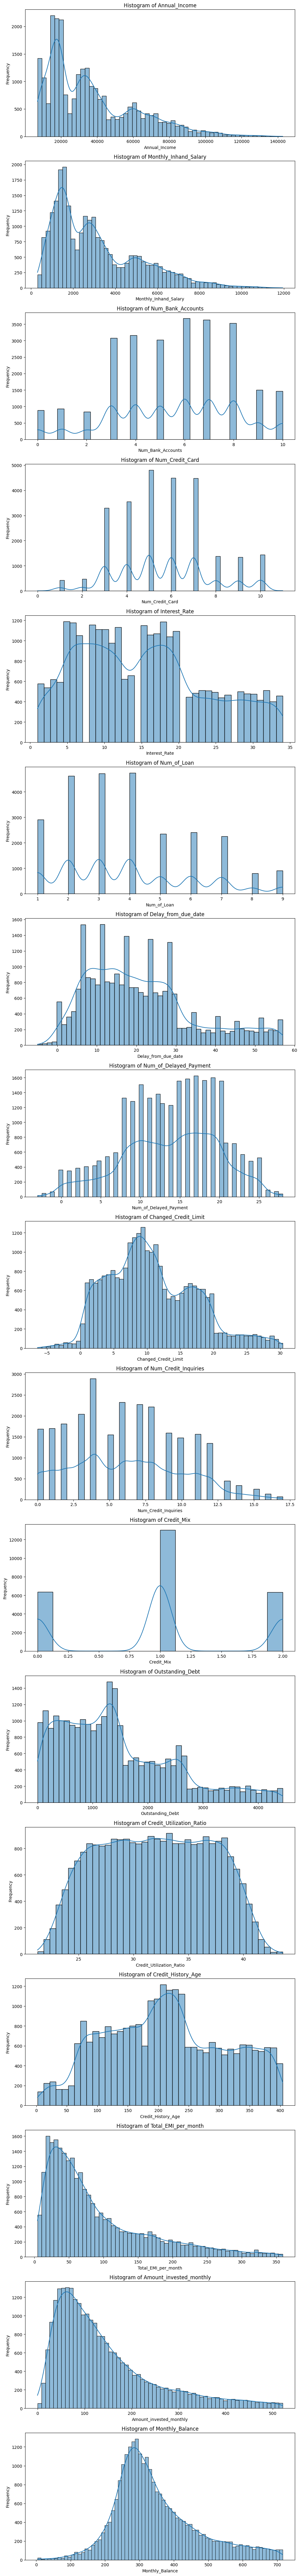

In [39]:
# List of columns to generate histograms for
columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
           'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
           'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
           'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
           'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 
           'Monthly_Balance']

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 5 * len(columns)))

# Loop through the columns and create a histogram for each
for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [40]:
# New feature between 'Num_Bank_Accounts' and 'Num_Credit_Card'
df['Accounts_Interaction'] = df['Num_Bank_Accounts'] * df['Num_Credit_Card']

print(df['Accounts_Interaction'])

6        12
8         8
9         8
12        8
13        8
         ..
98274    28
98277    28
98280    36
98285    36
98299     0
Name: Accounts_Interaction, Length: 25696, dtype: int64


In [41]:
# New feature using 'Outstanding_Debt' and  'Monthly_Inhand_Salary'
df['Debt_to_Income_Ratio_Per_Month'] = df['Outstanding_Debt'] / df['Monthly_Inhand_Salary']

print(df['Debt_to_Income_Ratio_Per_Month'])

6        0.443863
8        0.199155
9        0.199155
12       0.199155
13       0.199155
           ...   
98274    0.081728
98277    0.081728
98280    1.001520
98285    1.001520
98299    0.190107
Name: Debt_to_Income_Ratio_Per_Month, Length: 25696, dtype: float64


In [42]:
# New feature using Credit History Age and Credit Mix
df['History_Mix_Interaction'] = df['Credit_History_Age'] * df['Credit_Mix']

print(df['History_Mix_Interaction'] )

6        542.0
8        638.0
9        640.0
12       646.0
13       648.0
         ...  
98274    686.0
98277    692.0
98280      0.0
98285      0.0
98299    604.0
Name: History_Mix_Interaction, Length: 25696, dtype: float64


In [43]:
df.shape

(25696, 35)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25696 entries, 6 to 98299
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_ID                     25696 non-null  int64  
 1   Month                           25696 non-null  object 
 2   Age                             25696 non-null  float64
 3   Occupation                      25696 non-null  object 
 4   Annual_Income                   25696 non-null  float64
 5   Monthly_Inhand_Salary           25696 non-null  float64
 6   Num_Bank_Accounts               25696 non-null  int64  
 7   Num_Credit_Card                 25696 non-null  int64  
 8   Interest_Rate                   25696 non-null  int64  
 9   Num_of_Loan                     25696 non-null  float64
 10  Delay_from_due_date             25696 non-null  int64  
 11  Num_of_Delayed_Payment          25696 non-null  float64
 12  Changed_Credit_Limit            25696

In [45]:
df.to_csv("Train_Cleaned_Data.csv")

In [46]:
df=pd.read_csv("Train_Cleaned_Data.csv")
display(df)

,Unnamed: 0,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Accounts_Interaction,Debt_to_Income_Ratio_Per_Month,History_Mix_Interaction
0,6,1,July,23.0,Scientist,19114.12,1824.843333,3,4,3,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,12,0.443863,542.0
1,8,2,January,28.0,Teacher,34847.84,3037.986667,2,4,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.199155,638.0
2,9,2,February,28.0,Teacher,34847.84,3037.986667,2,4,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.199155,640.0
3,12,2,May,28.0,Teacher,34847.84,3037.986667,2,4,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.199155,646.0
4,13,2,June,28.0,Teacher,34847.84,3037.986667,2,4,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.199155,648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25691,98274,12285,March,24.0,Lawyer,59868.93,5111.077500,4,7,9,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,28,0.081728,686.0
25692,98277,12285,June,24.0,Lawyer,59868.93,5111.077500,4,7,9,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,28,0.081728,692.0
25693,98280,12286,January,31.0,Developer,28796.82,2378.735000,6,6,21,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,36,1.001520,0.0
25694,98285,12286,June,32.0,Developer,28796.82,2378.735000,6,6,21,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,36,1.001520,0.0


In [47]:
display(df.select_dtypes(include="object"))

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,July,Scientist,No,Low_spent_Small_value_payments,Good
1,January,Teacher,No,Low_spent_Small_value_payments,Standard
2,February,Teacher,No,High_spent_Large_value_payments,Good
3,May,Teacher,No,Low_spent_Small_value_payments,Good
4,June,Teacher,No,High_spent_Large_value_payments,Good
...,...,...,...,...,...
25691,March,Lawyer,No,High_spent_Small_value_payments,Standard
25692,June,Lawyer,No,High_spent_Medium_value_payments,Standard
25693,January,Developer,Yes,Low_spent_Medium_value_payments,Poor
25694,June,Developer,Yes,High_spent_Large_value_payments,Standard


Processing the column Month.
Processing the column Occupation.
Processing the column Payment_of_Min_Amount.
Processing the column Payment_Behaviour.


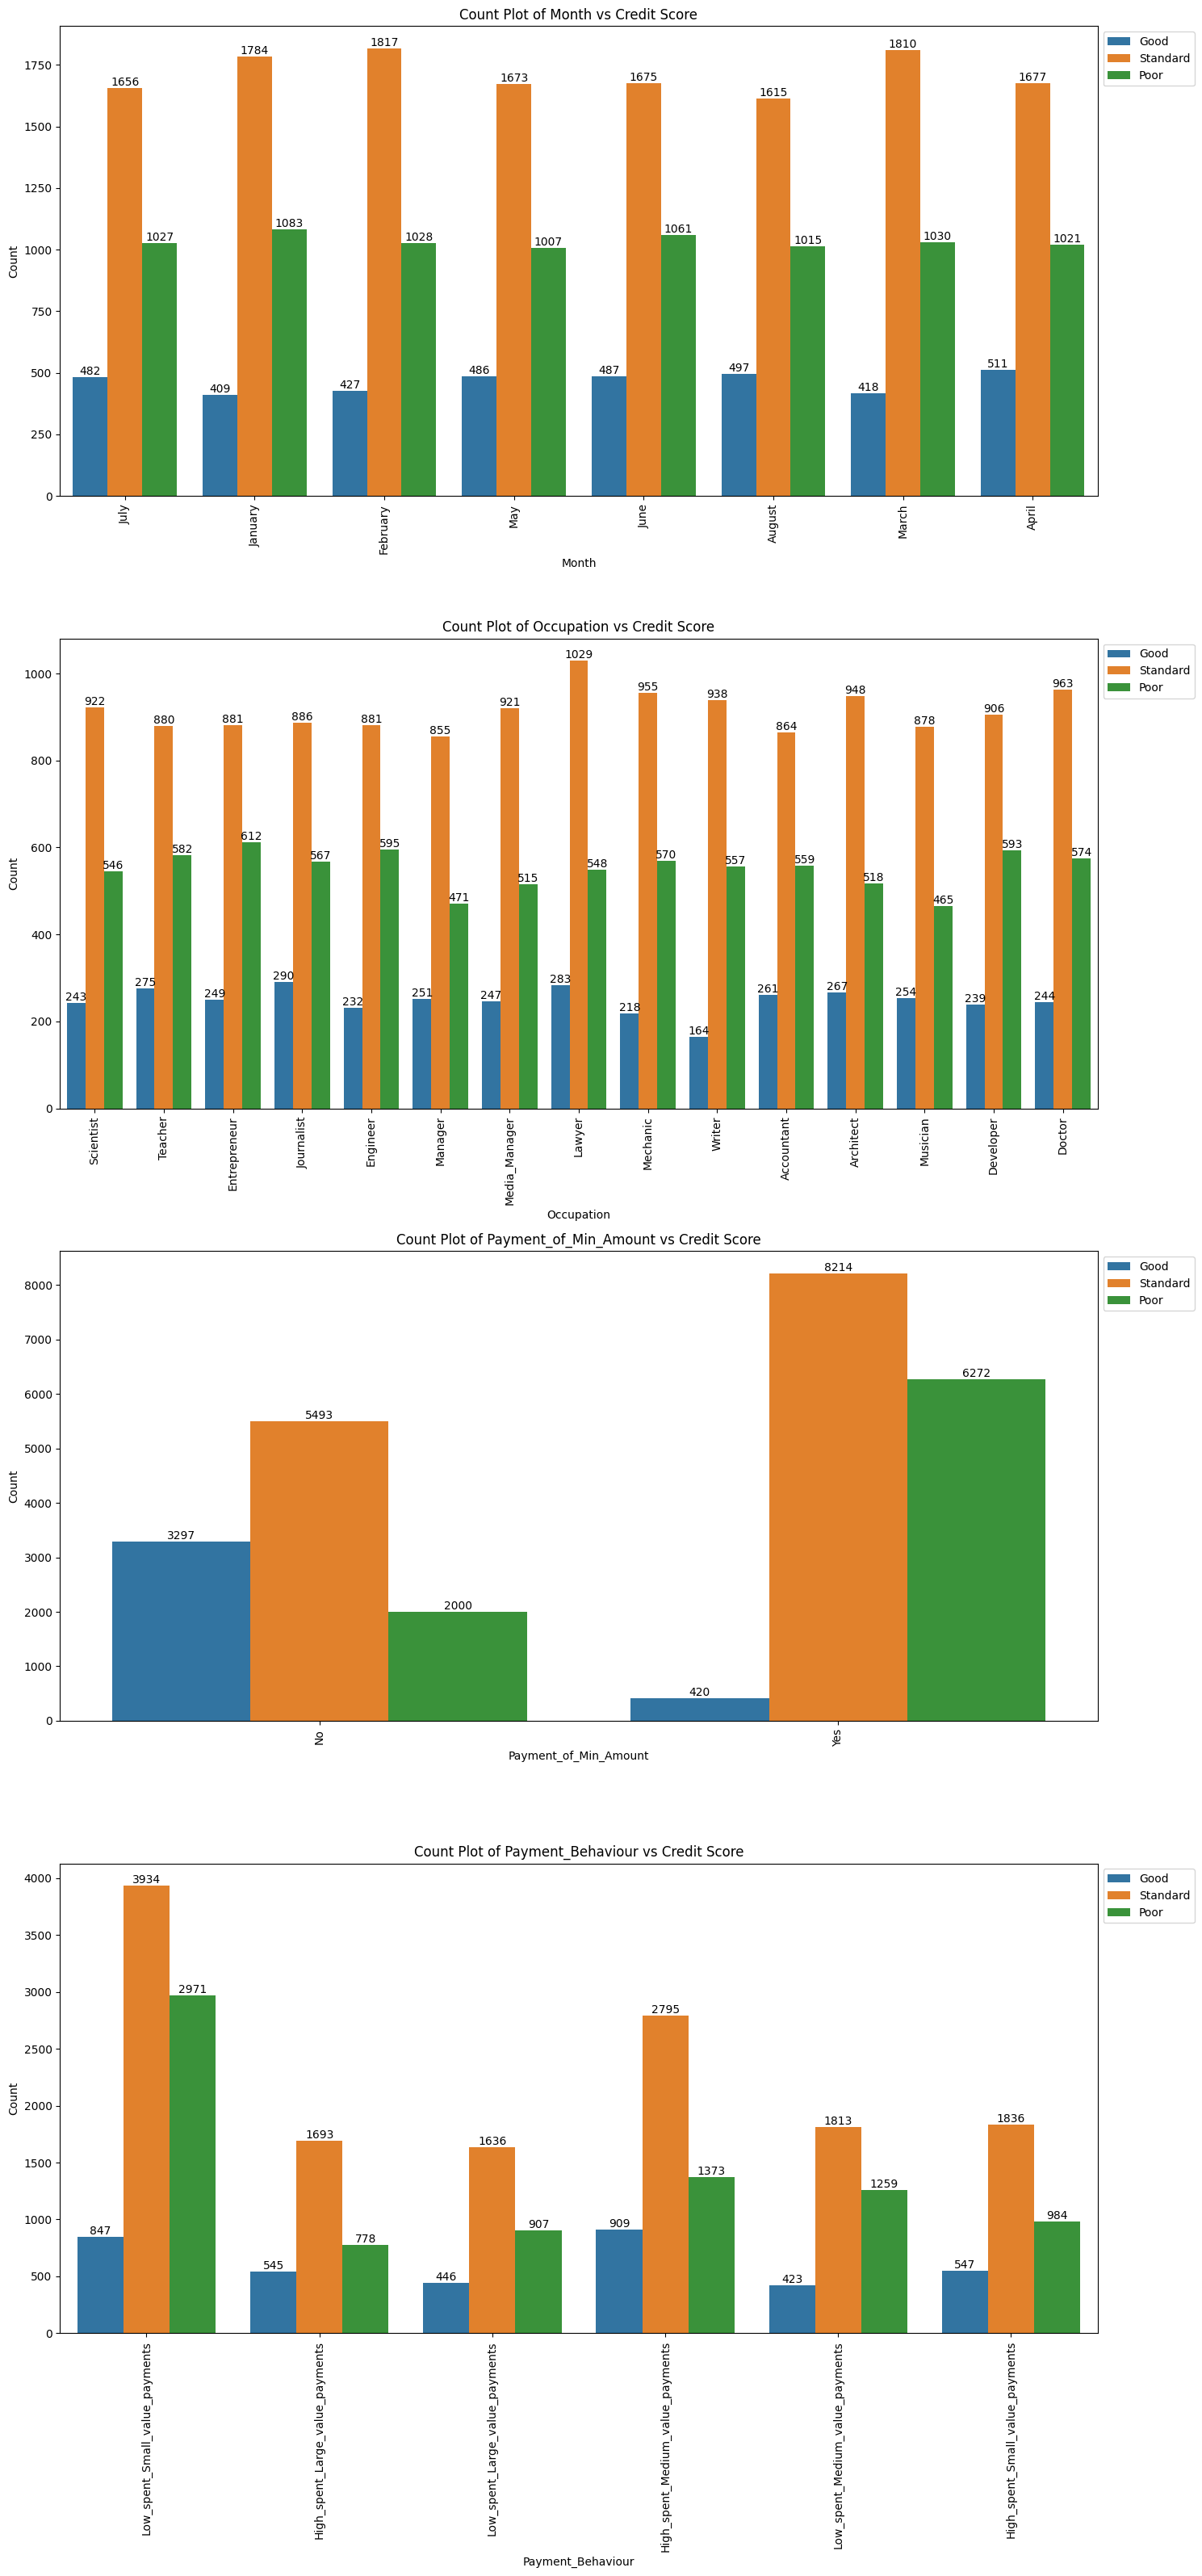

In [48]:
# Plot the data for visualization
cat_cols=["Month", "Occupation","Payment_of_Min_Amount","Payment_Behaviour"]
num_rows=len(cat_cols)
fig, axes = plt.subplots(num_rows, 1,figsize=(15,8*num_rows))
for i, col in enumerate(cat_cols):
    print(f"Processing the column {col}.")
    ax=axes[i]
    sns.countplot(x=col, hue="Credit_Score", data=df, ax=ax)
    for c in ax.containers:
        ax.bar_label(c,label_type="edge")
    ax.set_title(f"Count Plot of {col} vs Credit Score")
    ax.set_xlabel(f"{col}")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel("Count")
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

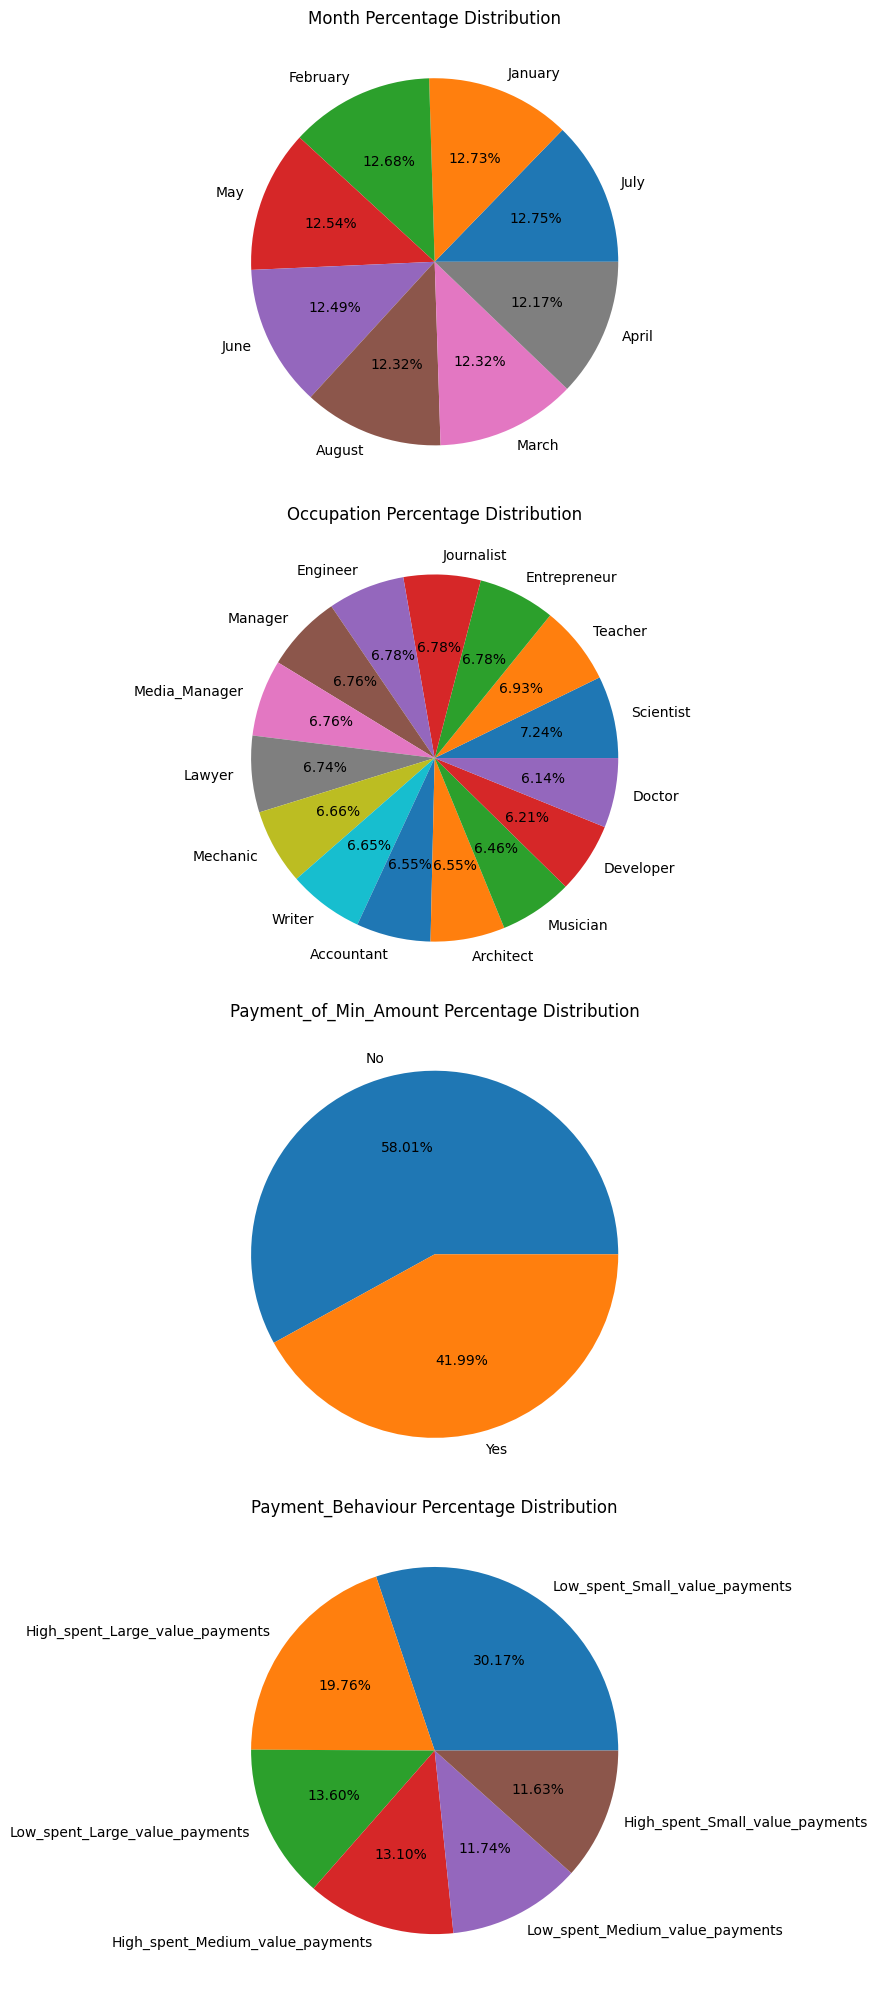

In [49]:
# Plot the data for visualization
fig, axes = plt.subplots(num_rows, 1,figsize=(15,5*num_rows))
for i, col in enumerate(cat_cols):
    ax=axes[i]
    ax.pie(df[col].value_counts().tolist(),labels=list(df[col].unique().tolist()), autopct='%1.2f%%')
    ax.set_title(f"{col} Percentage Distribution")
plt.tight_layout()
plt.show()

In [50]:
# converting categorical credit scores to numerical values
cred_score={"Poor": 0,"Standard":1,"Good": 2}
df["Credit_Score"]=df["Credit_Score"].map(cred_score)
display(df["Credit_Score"])

0        2
1        1
2        2
3        2
4        2
        ..
25691    1
25692    1
25693    0
25694    1
25695    1
Name: Credit_Score, Length: 25696, dtype: int64

In [51]:
# Drop columns
df=df.drop(["Unnamed: 0","Customer_ID"], axis=1)
print("Removing unneccary columns:")
display(df)

Removing unneccary columns:


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Accounts_Interaction,Debt_to_Income_Ratio_Per_Month,History_Mix_Interaction
0,July,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,12,0.443863,542.0
1,January,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.199155,638.0
2,February,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.199155,640.0
3,May,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.199155,646.0
4,June,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.199155,648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25691,March,24.0,Lawyer,59868.93,5111.077500,4,7,9,4.0,8,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,28,0.081728,686.0
25692,June,24.0,Lawyer,59868.93,5111.077500,4,7,9,4.0,8,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,28,0.081728,692.0
25693,January,31.0,Developer,28796.82,2378.735000,6,6,21,5.0,28,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,36,1.001520,0.0
25694,June,32.0,Developer,28796.82,2378.735000,6,6,21,5.0,30,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,36,1.001520,0.0


In [52]:
# Extract unique values of the 'Occupation' column
occupation_considered = df["Occupation"].unique()
# Loop
for occupation in occupation_considered:
    # for each occupation: 1 if the row has this occupation, otherwise 0
    df[occupation] = (df['Occupation'] == occupation).astype(float)
print("Making separate column for each occupation:")

# Drop the original 'Occupation' column
df = df.drop("Occupation", axis=1)
df.head()


Making separate column for each occupation:


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Manager,Media_Manager,Lawyer,Mechanic,Writer,Accountant,Architect,Musician,Developer,Doctor
0,July,23.0,19114.12,1824.843333,3,4,3,4.0,3,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,January,28.0,34847.84,3037.986667,2,4,6,1.0,3,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,February,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,May,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,June,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Drop column Month
df=df.drop("Month", axis=1)
display(df)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Manager,Media_Manager,Lawyer,Mechanic,Writer,Accountant,Architect,Musician,Developer,Doctor
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,8.0,11.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,6.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,5.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25691,24.0,59868.93,5111.077500,4,7,9,4.0,8,10.0,4.09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25692,24.0,59868.93,5111.077500,4,7,9,4.0,8,13.0,6.09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25693,31.0,28796.82,2378.735000,6,6,21,5.0,28,21.0,2.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25694,32.0,28796.82,2378.735000,6,6,21,5.0,30,23.0,2.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
# Extract unique values
payment_behaviour_considered = df["Payment_Behaviour"].unique()
# Loop
for payment_behaviour in payment_behaviour_considered:
    # for each payment behavior: 1 if the row has this behavior, otherwise 0
    df[payment_behaviour] = (df['Payment_Behaviour'] == payment_behaviour).astype(float)
print("Making separate column for each Payment Behaviour:")

# Drop the original 'Payment_Behaviour'
df = df.drop("Payment_Behaviour", axis=1)
df.head()


Making separate column for each Payment Behaviour:


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Architect,Musician,Developer,Doctor,Low_spent_Small_value_payments,High_spent_Large_value_payments,Low_spent_Large_value_payments,High_spent_Medium_value_payments,Low_spent_Medium_value_payments,High_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,8.0,11.27,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,28.0,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,6.42,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,5.42,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [55]:
# Applying Labels to column 'Payment_of_Min_Amount'
df["Payment_of_Min_Amount"]=LabelEncoder().fit_transform(df["Payment_of_Min_Amount"])
print("Label Encoding the Payment of Minimum Amount:")
display(df)

Label Encoding the Payment of Minimum Amount:


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Architect,Musician,Developer,Doctor,Low_spent_Small_value_payments,High_spent_Large_value_payments,Low_spent_Large_value_payments,High_spent_Medium_value_payments,Low_spent_Medium_value_payments,High_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,8.0,11.27,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,28.0,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,6.42,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,5.42,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25691,24.0,59868.93,5111.077500,4,7,9,4.0,8,10.0,4.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25692,24.0,59868.93,5111.077500,4,7,9,4.0,8,13.0,6.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25693,31.0,28796.82,2378.735000,6,6,21,5.0,28,21.0,2.78,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25694,32.0,28796.82,2378.735000,6,6,21,5.0,30,23.0,2.78,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25696 entries, 0 to 25695
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               25696 non-null  float64
 1   Annual_Income                     25696 non-null  float64
 2   Monthly_Inhand_Salary             25696 non-null  float64
 3   Num_Bank_Accounts                 25696 non-null  int64  
 4   Num_Credit_Card                   25696 non-null  int64  
 5   Interest_Rate                     25696 non-null  int64  
 6   Num_of_Loan                       25696 non-null  float64
 7   Delay_from_due_date               25696 non-null  int64  
 8   Num_of_Delayed_Payment            25696 non-null  float64
 9   Changed_Credit_Limit              25696 non-null  float64
 10  Num_Credit_Inquiries              25696 non-null  float64
 11  Credit_Mix                        25696 non-null  float64
 12  Outs

None

In [57]:
df.to_csv("Train_Preprocessed.csv")

In [58]:
df=pd.read_csv("Train_Preprocessed.csv")
display(df)

,Unnamed: 0,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Architect,Musician,Developer,Doctor,Low_spent_Small_value_payments,High_spent_Large_value_payments,Low_spent_Large_value_payments,High_spent_Medium_value_payments,Low_spent_Medium_value_payments,High_spent_Small_value_payments
0,0,23.0,19114.12,1824.843333,3,4,3,4.0,3,8.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,28.0,34847.84,3037.986667,2,4,6,1.0,3,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25691,25691,24.0,59868.93,5111.077500,4,7,9,4.0,8,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25692,25692,24.0,59868.93,5111.077500,4,7,9,4.0,8,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25693,25693,31.0,28796.82,2378.735000,6,6,21,5.0,28,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25694,25694,32.0,28796.82,2378.735000,6,6,21,5.0,30,23.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


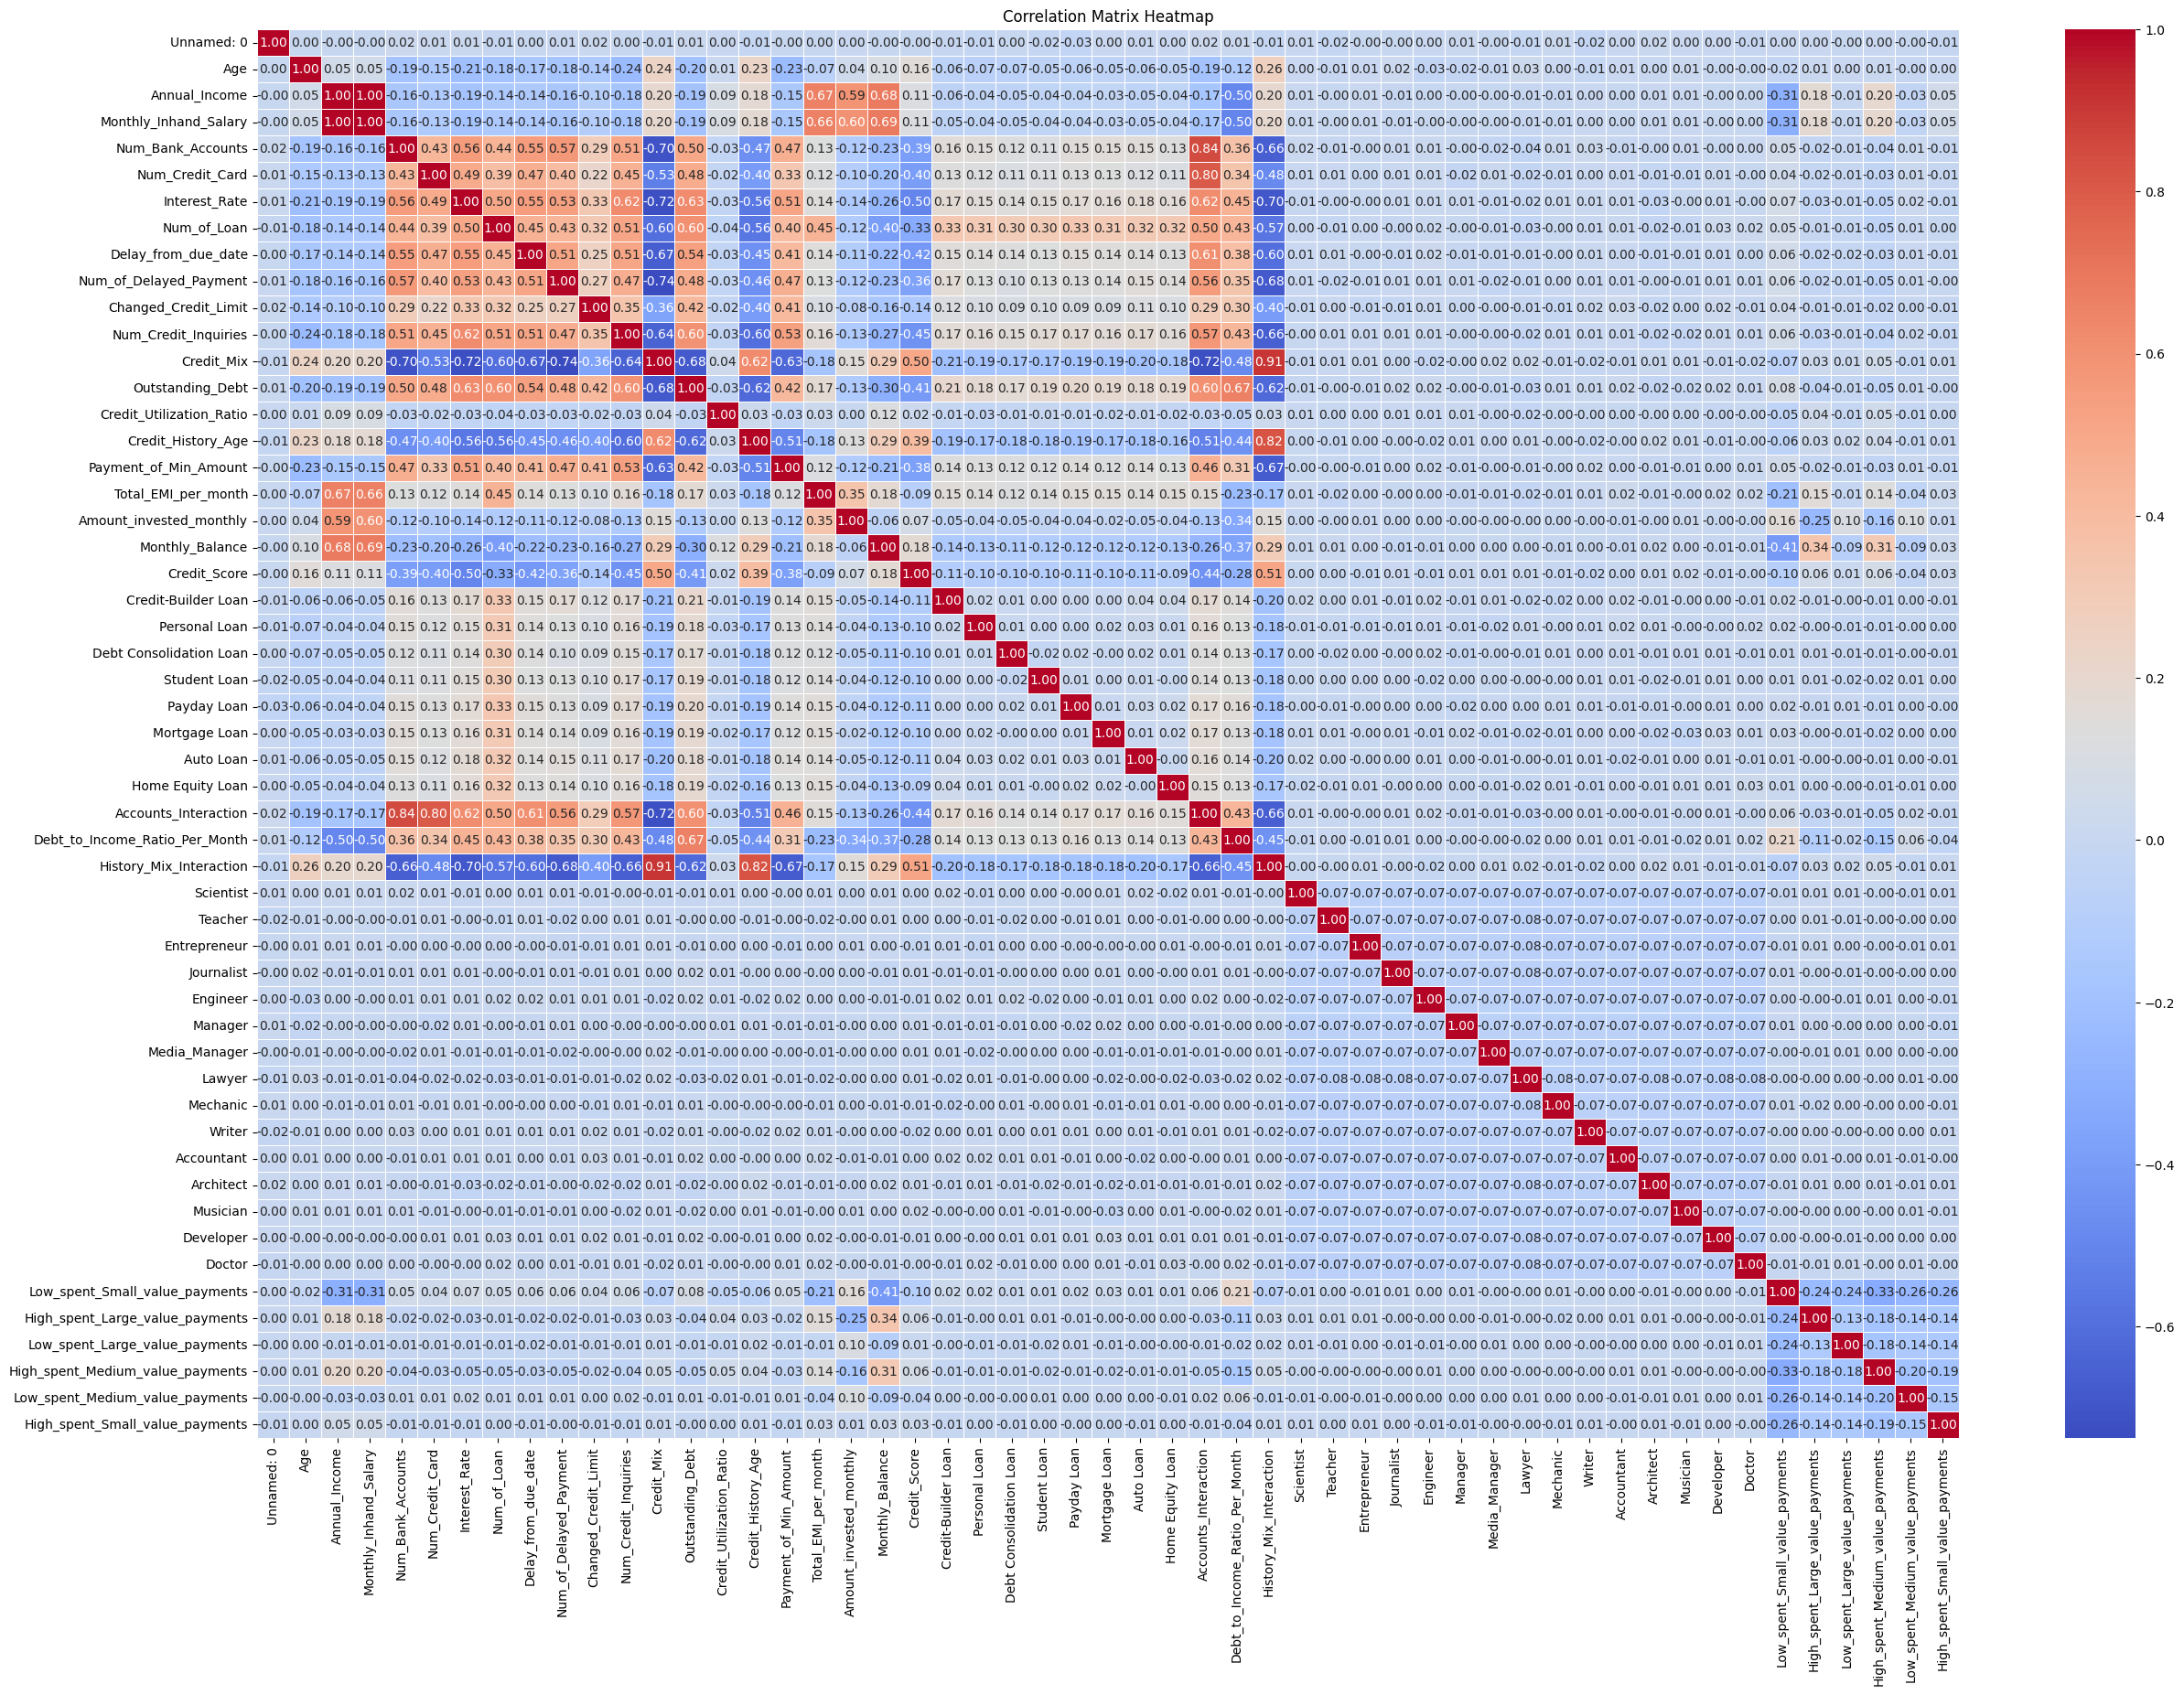

In [59]:
# Plot the data for visualization
correlation_matrix = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25696 entries, 0 to 25695
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        25696 non-null  int64  
 1   Age                               25696 non-null  float64
 2   Annual_Income                     25696 non-null  float64
 3   Monthly_Inhand_Salary             25696 non-null  float64
 4   Num_Bank_Accounts                 25696 non-null  int64  
 5   Num_Credit_Card                   25696 non-null  int64  
 6   Interest_Rate                     25696 non-null  int64  
 7   Num_of_Loan                       25696 non-null  float64
 8   Delay_from_due_date               25696 non-null  int64  
 9   Num_of_Delayed_Payment            25696 non-null  float64
 10  Changed_Credit_Limit              25696 non-null  float64
 11  Num_Credit_Inquiries              25696 non-null  float64
 12  Cred

In [61]:
df_test = pd.read_csv("test.csv")
display(df_test)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [63]:
# Check for any missing values in the dataset
print("Number of nulls in each column:")
print(df_test.isnull().sum())

# Dropping unnecessary columns
df_test = df_test.drop(["ID", "Name", "SSN"], axis=1)
print("Dropping unnecessary columns of all unique values:")

# Fixing numerical columns
num_col_to_fix = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
                  "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", 
                  "Monthly_Balance"]

def fix_nums(num):
    try:
        return float(num.replace("_", ""))
    except:
        return np.nan

for col in num_col_to_fix:
    df_test[col] = df_test[col].apply(fix_nums)

print(df_test["Type_of_Loan"].value_counts().head(16))
loan_considered = df_test["Type_of_Loan"].value_counts().head(9).index[1:].to_list()
for i in loan_considered:
    df_test[i] = df_test["Type_of_Loan"].str.contains(i)

for col in ['Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 
            'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']:
    df_test[col] = df_test[col].astype(float)

df_test = df_test.drop("Type_of_Loan", axis=1)

df_test['Num_Bank_Accounts'] = df_test['Num_Bank_Accounts'].apply(lambda x: abs(x))
print("Converting all the number of bank accounts into absolute numbers:")

def fix_history_age(age):
    try:
        years = int("".join(re.findall('[0-9]', ''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]', ''.join(age.split("and")[1]))))
        return years * 12 + month
    except:
        return np.nan

print("Applying function to fix the credit history age.")
df_test['Credit_History_Age'] = df_test['Credit_History_Age'].apply(fix_history_age)
display(df_test["Credit_History_Age"])

df_test['Payment_of_Min_Amount'].replace("NM", "No", inplace=True)
display(df_test['Payment_of_Min_Amount'].unique())

print("Replacing special characters with null.")
df_test['Payment_Behaviour'] = df_test['Payment_Behaviour'].replace("!@9#%8", np.nan)

print("Duplicate IDs spotted with different occupation. Fixing all the occupation rows.")
affected_ids = df_test[df_test["Occupation"] == "_______"]["Customer_ID"]
total_affected_ids = len(affected_ids)
k = 0
for ID in affected_ids:
    k += 1
    print(f"In total of {total_affected_ids} rows, processing the {k}th row.", end='\r')
    oc = df_test[df_test["Customer_ID"] == ID]['Occupation'].mode()[0]
    df_test.loc[df_test['Customer_ID'] == ID, 'Occupation'] = oc
print("All replacements are completed.")

print("Replacing the rest with their mode.")
df_test["Occupation"] = df_test["Occupation"].replace("_______", df_test["Occupation"].mode()[0])
display(df_test["Occupation"])

credit_mix_dic = {"Bad": 0, "Standard": 1, "Good": 2, "-": np.nan}
print("Label encoding Credit Mix manually.")
df_test['Credit_Mix'] = df_test['Credit_Mix'].map(credit_mix_dic)

IDs = 1
total_rows = df_test.shape[0]
unique_ids = df_test['Customer_ID'].unique()
for ID in unique_ids:
    df_test['Customer_ID'] = df_test['Customer_ID'].replace(ID, IDs)
    IDs += 1
print("Replaced customer IDs with simple integers:")

print("Checking the number of numerical columns now:")
num_cols = df_test.select_dtypes(exclude='object').columns
display(num_cols)

# Dropping all rows that have null values
df_test = df_test.dropna()
print("Number of rows and columns after dropping null values:", df_test.shape)

# Outlier detection and replacement
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # List of indices of outliers
    outliers_list = data.index[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers_list

print("Dropping outliers:")
outliers_indices = set()
for col in df.select_dtypes(include=['float64', 'int64']).columns:  # Adjust to select only numeric columns
    print(f"Processing the column {col}.")
    outliers_indices.update(detect_outliers(df, col))

# Drop the rows with outliers
df = df.drop(index=outliers_indices)
print(f"Dropped {len(outliers_indices)} rows containing outliers.")

df_test['Accounts_Interaction'] = df_test['Num_Bank_Accounts'] * df_test['Num_Credit_Card']
df_test['Debt_to_Income_Ratio_Per_Month'] = df_test['Outstanding_Debt'] / df_test['Monthly_Inhand_Salary']
df_test['History_Mix_Interaction'] = df_test['Credit_History_Age'] * df_test['Credit_Mix']

df_test["Payment_of_Min_Amount"] = LabelEncoder().fit_transform(df_test["Payment_of_Min_Amount"])

print("Removing unnecessary columns:")
df_test = df_test.drop(["Customer_ID"], axis=1)

print("Making separate column for each occupation:")
occupation_considered = df_test["Occupation"].unique()
for occupation in occupation_considered:
    df_test[occupation] = (df_test['Occupation'] == occupation).astype(float)
df_test = df_test.drop("Occupation", axis=1)

df_test = df_test.drop("Month", axis=1)

payment_behaviour_considered = df_test["Payment_Behaviour"].unique()
for payment_behaviour in payment_behaviour_considered:
    df_test[payment_behaviour] = (df_test['Payment_Behaviour'] == payment_behaviour).astype(float)
print("Making separate column for each Payment Behaviour:")
df_test = df_test.drop("Payment_Behaviour", axis=1)

df_test.to_csv("Test_Preprocessed.csv")

print("Preprocessing complete and saved to 'Test_Preprocessed.csv'.")


Number of nulls in each column:
ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64
Dropping unnecessary columns of all unique values:
Type_of_Loan


0        273.0
1        274.0
2          NaN
3        276.0
4        327.0
         ...  
49995      NaN
49996    383.0
49997    384.0
49998    385.0
49999    386.0
Name: Credit_History_Age, Length: 50000, dtype: float64

array(['No', 'Yes'], dtype=object)

Replacing special characters with null.
Duplicate IDs spotted with different occupation. Fixing all the occupation rows.
All replacements are completed.ng the 3438th row.
Replacing the rest with their mode.


0        Scientist
1        Scientist
2        Scientist
3        Scientist
4          Teacher
           ...    
49995    Architect
49996     Mechanic
49997     Mechanic
49998     Mechanic
49999     Mechanic
Name: Occupation, Length: 50000, dtype: object

Label encoding Credit Mix manually.
Replaced customer IDs with simple integers:
Checking the number of numerical columns now:


Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

Number of rows and columns after dropping null values: (21313, 31)
Dropping outliers:
Processing the column Unnamed: 0.
Processing the column Age.
Processing the column Annual_Income.
Processing the column Monthly_Inhand_Salary.
Processing the column Num_Bank_Accounts.
Processing the column Num_Credit_Card.
Processing the column Interest_Rate.
Processing the column Num_of_Loan.
Processing the column Delay_from_due_date.
Processing the column Num_of_Delayed_Payment.
Processing the column Changed_Credit_Limit.
Processing the column Num_Credit_Inquiries.
Processing the column Credit_Mix.
Processing the column Outstanding_Debt.
Processing the column Credit_Utilization_Ratio.
Processing the column Credit_History_Age.
Processing the column Payment_of_Min_Amount.
Processing the column Total_EMI_per_month.
Processing the column Amount_invested_monthly.
Processing the column Monthly_Balance.
Processing the column Credit_Score.
Processing the column Credit-Builder Loan.
Processing the column Per

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21313 entries, 0 to 49997
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               21313 non-null  float64
 1   Annual_Income                     21313 non-null  float64
 2   Monthly_Inhand_Salary             21313 non-null  float64
 3   Num_Bank_Accounts                 21313 non-null  int64  
 4   Num_Credit_Card                   21313 non-null  int64  
 5   Interest_Rate                     21313 non-null  int64  
 6   Num_of_Loan                       21313 non-null  float64
 7   Delay_from_due_date               21313 non-null  int64  
 8   Num_of_Delayed_Payment            21313 non-null  float64
 9   Changed_Credit_Limit              21313 non-null  float64
 10  Num_Credit_Inquiries              21313 non-null  float64
 11  Credit_Mix                        21313 non-null  float64
 12  Outstandi

In [65]:
train_df = pd.read_csv('train_Preprocessed.csv')
test_df = pd.read_csv('test_Preprocessed.csv')

# Aligning the columns of test with train file
target_column = 'Credit_Score'
align_columns = [col for col in train_df.columns if col != target_column]

test_df_aligned = test_df[align_columns]

test_df_aligned.to_csv('aligned_test_Preprocessed.csv', index=False)


In [2]:
train_df = pd.read_csv('Train_Preprocessed.csv')

X = train_df.drop(['Credit_Score', 'Unnamed: 0'], axis=1)
y = train_df['Credit_Score']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest model
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'bootstrap': [True]
}

# StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=strat_k_fold, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Cross-validate the best model on the entire dataset
cross_val_scores = cross_val_score(best_model, X, y, cv=strat_k_fold, scoring='accuracy')
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean CV Accuracy: {cross_val_scores.mean()}")

y_pred = best_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'bootstrap': True, 'max_depth': 30, 'n_estimators': 200}
Best score: 0.7785072695728552
Cross-Validation Scores: [0.79163424 0.79081533 0.79081533 0.78575598 0.78925861]
Mean CV Accuracy: 0.7896559005938415
Validation Accuracy: 0.7920233463035019
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1664
           1       0.81      0.81      0.81      2737
           2       0.74      0.72      0.73       739

    accuracy                           0.79      5140
   macro avg       0.78      0.78      0.78      5140
weighted avg       0.79      0.79      0.79      5140



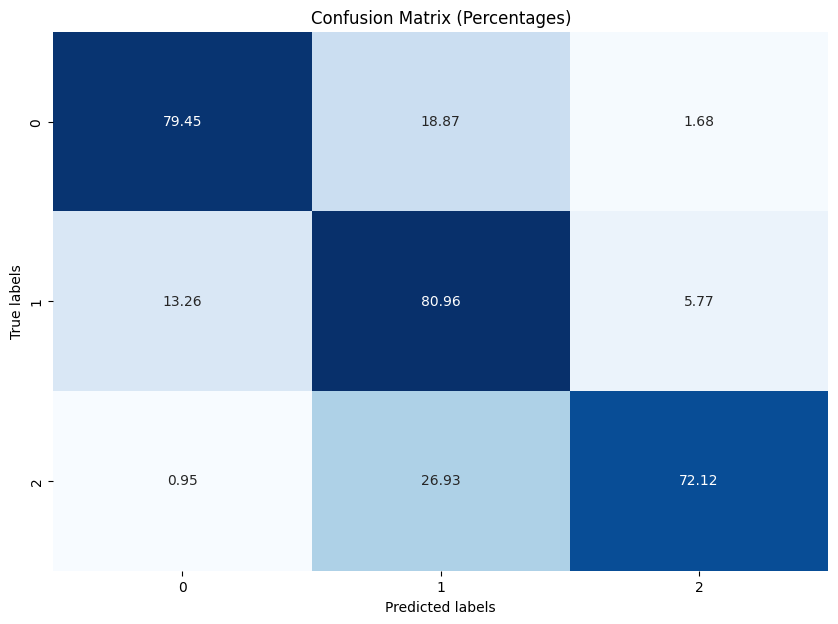

In [3]:
conf_matrix = confusion_matrix(y_val, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting using seaborn for a more aesthetic heatmap display
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10}
Best score: 0.7256275040770372
Validation Accuracy: 0.7328793774319066
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1664
           1       0.76      0.77      0.77      2737
           2       0.61      0.60      0.61       739

    accuracy                           0.73      5140
   macro avg       0.70      0.70      0.70      5140
weighted avg       0.73      0.73      0.73      5140



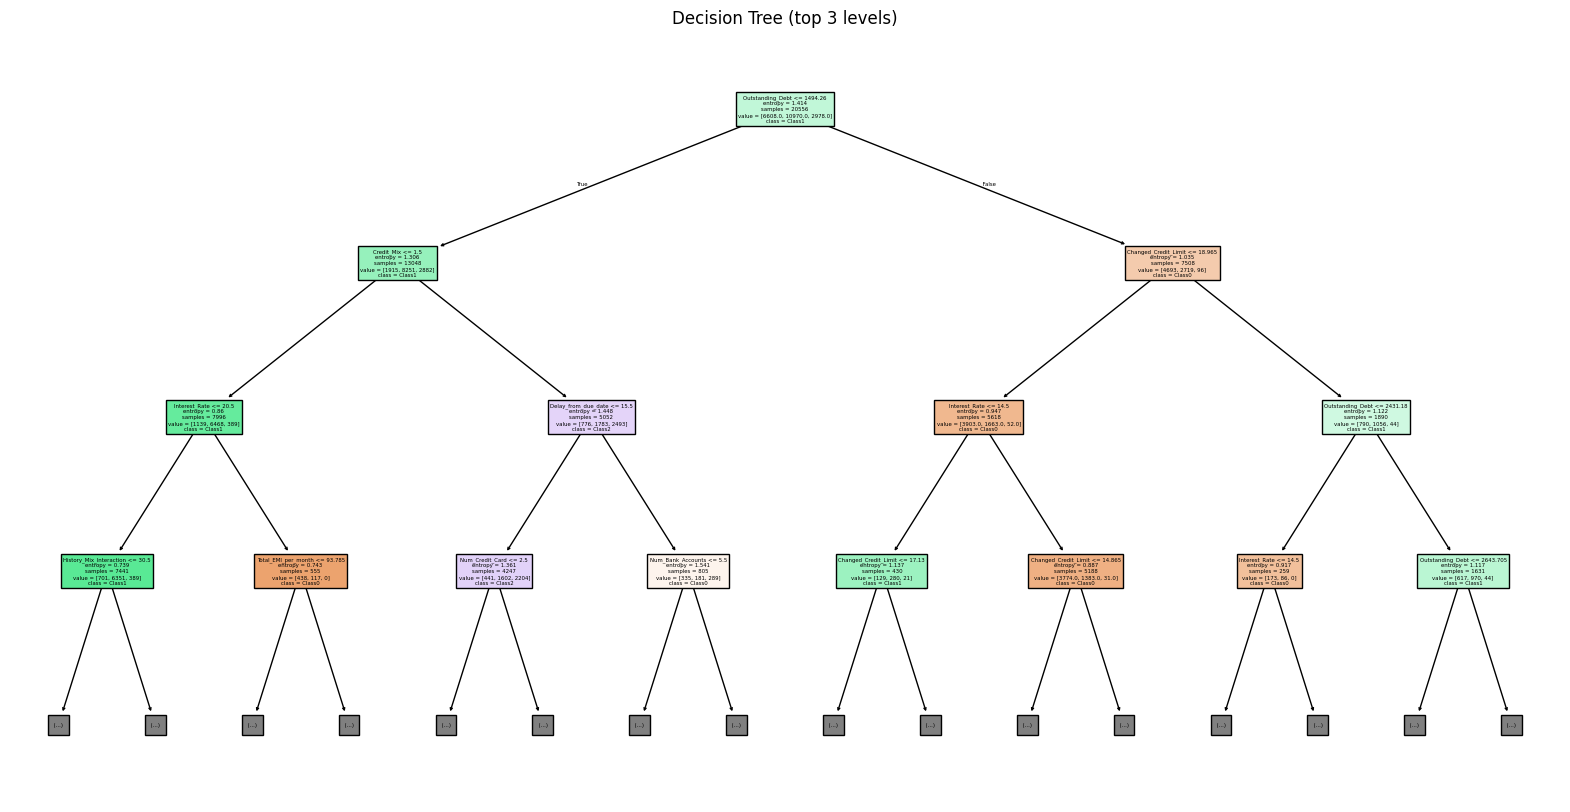

In [68]:
train_df = pd.read_csv('Train_Preprocessed.csv')

X = train_df.drop(['Credit_Score', 'Unnamed: 0'], axis=1)
y = train_df['Credit_Score']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_dt))
print(classification_report(y_val, y_pred_dt))

# Visualizing the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=['Class0', 'Class1', 'Class2'], max_depth=3)
plt.title('Decision Tree (top 3 levels)')
plt.show()


In [69]:
train_df = pd.read_csv('Train_Preprocessed.csv')

X = train_df.drop(['Credit_Score', 'Unnamed: 0'], axis=1)
y = train_df['Credit_Score']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='multi:softprob', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate on the validation set using the best model
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best score: 0.7657130508732858
Validation Accuracy: 0.775875486381323
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1664
           1       0.80      0.80      0.80      2737
           2       0.72      0.68      0.70       739

    accuracy                           0.78      5140
   macro avg       0.76      0.75      0.76      5140
weighted avg       0.78      0.78      0.78      5140



In [70]:
test_df = pd.read_csv('aligned_test_Preprocessed.csv')

X_test = test_df.drop('Unnamed: 0', axis=1)

# Make predictions using the best model
test_predictions = best_model.predict(X_test)

# Convert numerical predictions to labels
labels = {0: "Poor", 1: "Standard", 2: "Good"}
test_df['Predicted_Credit_Score'] = [labels[pred] for pred in test_predictions]

test_df.to_csv('test_with_Predicted_Credit_Scores.csv', index=False)

# Print the first few predictions
print("First few predictions in the test dataset:")
print(test_df[['Predicted_Credit_Score']].head(10))


First few predictions in the test dataset:
  Predicted_Credit_Score
0                   Good
1                   Good
2                   Good
3                   Good
4                   Good
5               Standard
6               Standard
7               Standard
8               Standard
9                   Good
